# Linear Regression

### import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) 

### Load DataSet

In [2]:
salary_data = pd.read_csv('Salary_Data.csv')

In [3]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary_data.shape

(30, 2)

### plot the relationship

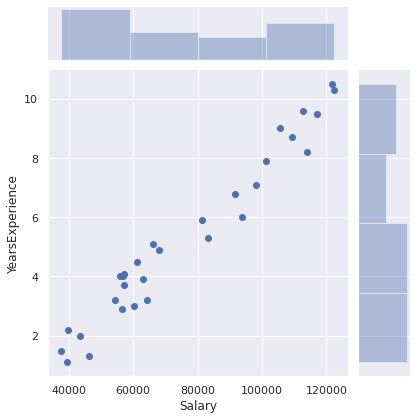

In [5]:
sns.jointplot(salary_data['Salary'],salary_data['YearsExperience']);

In [6]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


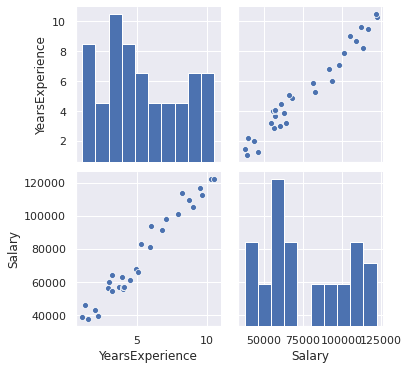

In [8]:
sns.pairplot(salary_data[['YearsExperience','Salary']]);

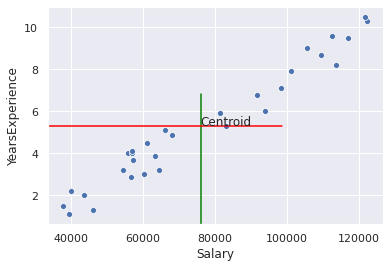

In [44]:
# Displaying centroid

# calculate mean
salary_mean = salary_data.Salary.mean()
yoe_mean = salary_data.YearsExperience.mean()

# scatter plot
sns.scatterplot(salary_data['Salary'],salary_data['YearsExperience']);

# draw horizontal and vertical line on mean
plt.axvline(x=salary_mean,ymax=0.6,color="green");
plt.axhline(y=yoe_mean,xmax=0.7,color="red");

# display text
plt.text(x=salary_mean,y=yoe_mean,s="Centroid");